In [1]:
'''
About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  
'''

'\nAbout the data: \nLet’s consider a Company dataset with around 10 variables and 400 records. \nThe attributes are as follows: \n\uf0ae Sales -- Unit sales (in thousands) at each location\n\uf0ae Competitor Price -- Price charged by competitor at each location\n\uf0ae Income -- Community income level (in thousands of dollars)\n\uf0ae Advertising -- Local advertising budget for company at each location (in thousands of dollars)\n\uf0ae Population -- Population size in region (in thousands)\n\uf0ae Price -- Price company charges for car seats at each site\n\uf0ae Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site\n\uf0ae Age -- Average age of the local population\n\uf0ae Education -- Education level at each location\n\uf0ae Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location\n\uf0ae US -- A factor with levels No and Yes to indicate whethe

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 84A1-6D3A

 Directory of C:\Users\hp\Documents\EXCELR\DS_Assign_Ans

08/09/2023  01:40 AM           391,960  Naive Bayes_Salary.ipynb
08/10/2023  01:32 AM    <DIR>          .
08/02/2023  05:51 PM    <DIR>          ..
08/10/2023  12:58 AM    <DIR>          .ipynb_checkpoints
07/26/2023  05:55 PM           783,051 50_startups data-MLR.ipynb
07/26/2023  12:10 PM             2,438 50_Startups.csv
08/02/2023  02:05 PM            30,582 Afinn.csv
07/28/2023  07:07 PM            81,413 Airlines_DBSCAN.ipynb
07/28/2023  07:12 PM           159,209 Airlines_Hierarchical_clustering.ipynb
07/28/2023  07:09 PM           145,996 Airlines_Kmeans.ipynb
08/01/2023  03:25 PM           164,575 apriori algorithm_Book.ipynb
08/01/2023  03:29 PM           182,205 apriori algorithm-my_movies.ipynb
08/02/2023  10:55 AM               247 Assignment.txt
07/26/2023  06:03 PM         4,610,348 bank-full.csv
04/26/2023  08:47 AM    <DIR>          Basic_Stat

In [4]:
data= pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data.shape

(400, 11)

In [7]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
data['Sales'].min()

0.0

In [10]:
data['Sales'].max()

16.27

In [11]:
#Converting target variable in categorical variable
data['Sales'] = np.where(data['Sales']>=8,'yes','no')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,yes,138,73,11,276,120,Bad,42,17,Yes,Yes
1,yes,111,48,16,260,83,Good,65,10,Yes,Yes
2,yes,113,35,10,269,80,Medium,59,12,Yes,Yes
3,no,117,100,4,466,97,Medium,55,14,Yes,Yes
4,no,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,yes,138,108,17,203,128,Good,33,14,Yes,Yes
396,no,139,23,3,37,120,Medium,55,11,No,Yes
397,no,162,26,12,368,159,Medium,40,18,Yes,Yes
398,no,100,79,7,284,95,Bad,50,12,Yes,Yes


In [12]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,yes,138,73,11,276,120,Bad,42,17,Yes,Yes
1,yes,111,48,16,260,83,Good,65,10,Yes,Yes
2,yes,113,35,10,269,80,Medium,59,12,Yes,Yes
3,no,117,100,4,466,97,Medium,55,14,Yes,Yes
4,no,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,yes,138,108,17,203,128,Good,33,14,Yes,Yes
396,no,139,23,3,37,120,Medium,55,11,No,Yes
397,no,162,26,12,368,159,Medium,40,18,Yes,Yes
398,no,100,79,7,284,95,Bad,50,12,Yes,Yes


In [13]:
data.dtypes

Sales          object
CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
dtype: object

In [14]:
#One Hot Encoding for categorical data
data=pd.get_dummies(data,columns=['ShelveLoc'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,yes,138,73,11,276,120,42,17,Yes,Yes,1,0,0
1,yes,111,48,16,260,83,65,10,Yes,Yes,0,1,0
2,yes,113,35,10,269,80,59,12,Yes,Yes,0,0,1
3,no,117,100,4,466,97,55,14,Yes,Yes,0,0,1
4,no,141,64,3,340,128,38,13,Yes,No,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,yes,138,108,17,203,128,33,14,Yes,Yes,0,1,0
396,no,139,23,3,37,120,55,11,No,Yes,0,0,1
397,no,162,26,12,368,159,40,18,Yes,Yes,0,0,1
398,no,100,79,7,284,95,50,12,Yes,Yes,1,0,0


In [15]:
data['Sales'].value_counts()

no     236
yes    164
Name: Sales, dtype: int64

In [16]:
# Label Encoding
label_encoder = preprocessing.LabelEncoder()
data['Urban']=label_encoder.fit_transform(data['Urban'])
data['US']=label_encoder.fit_transform(data['US'])
data['Sales']=label_encoder.fit_transform(data['Sales'])

In [17]:
data['Sales'].value_counts()

0    236
1    164
Name: Sales, dtype: int64

In [18]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,1,138,73,11,276,120,42,17,1,1,1,0,0
1,1,111,48,16,260,83,65,10,1,1,0,1,0
2,1,113,35,10,269,80,59,12,1,1,0,0,1
3,0,117,100,4,466,97,55,14,1,1,0,0,1
4,0,141,64,3,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,33,14,1,1,0,1,0
396,0,139,23,3,37,120,55,11,0,1,0,0,1
397,0,162,26,12,368,159,40,18,1,1,0,0,1
398,0,100,79,7,284,95,50,12,1,1,1,0,0


#### Model Building

In [19]:
X=pd.concat([data.iloc[:,1:]])
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,1,1,1,0,0
1,111,48,16,260,83,65,10,1,1,0,1,0
2,113,35,10,269,80,59,12,1,1,0,0,1
3,117,100,4,466,97,55,14,1,1,0,0,1
4,141,64,3,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,0,1,0
396,139,23,3,37,120,55,11,0,1,0,0,1
397,162,26,12,368,159,40,18,1,1,0,0,1
398,100,79,7,284,95,50,12,1,1,1,0,0


In [20]:
Y=data.iloc[:,0]
Y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int32

In [21]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, Y,random_state=20,test_size=0.3)

In [22]:
X_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
268,123,57,0,66,105,39,11,1,0,0,0,1
108,107,79,2,488,103,65,16,1,0,1,0,0
21,134,29,12,239,109,62,18,0,1,0,1,0
231,132,69,0,123,122,27,11,0,0,0,0,1
33,114,38,13,317,128,50,16,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
393,109,51,10,26,120,30,17,0,1,0,0,1
218,138,61,12,156,120,25,14,1,1,0,0,1
223,110,45,9,276,125,62,14,1,1,0,0,1
271,111,56,0,504,110,62,16,1,0,0,0,1


### DecisionTreeClassifier

#### Entropy

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
treemodel=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [25]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

<Figure size 1500x1000 with 0 Axes>

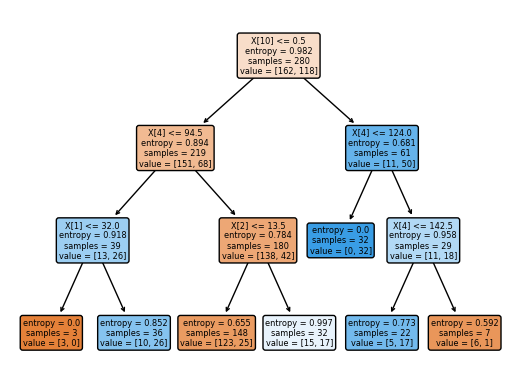

<Figure size 1500x1000 with 0 Axes>

In [26]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

plot_tree(treemodel,rounded = True,filled = True)

plt.figure(figsize=(15,10))

In [27]:
#prediction
y_pred=treemodel.predict(X_test)

In [28]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [29]:
from sklearn.metrics import accuracy_score,classification_report

In [30]:
score=accuracy_score(y_pred,y_test)
print(score)

0.75


In [31]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        74
           1       0.67      0.67      0.67        46

    accuracy                           0.75       120
   macro avg       0.74      0.74      0.74       120
weighted avg       0.75      0.75      0.75       120



#### CART using Gini

In [32]:
treemodel=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [33]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
#prediction
y_pred=treemodel.predict(X_test)
np.mean(y_pred==y_test)

0.7333333333333333

In [35]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [36]:
score=accuracy_score(y_pred,y_test)
print(score)

0.7333333333333333


In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        78
           1       0.61      0.67      0.64        42

    accuracy                           0.73       120
   macro avg       0.71      0.72      0.71       120
weighted avg       0.74      0.73      0.74       120



#### Using Pre prunning

In [38]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [39]:
from sklearn.model_selection import GridSearchCV


In [40]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [41]:
cv.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, Fi

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [42]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [43]:
y_test

10     1
382    0
374    1
196    0
47     0
      ..
147    1
375    0
113    0
291    0
172    1
Name: Sales, Length: 120, dtype: int32

In [44]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [45]:
y_pred=cv.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, classification_report

In [47]:
score=accuracy_score(y_pred,y_test)

In [48]:
score

0.6666666666666666

In [49]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        86
           1       0.43      0.59      0.50        34

    accuracy                           0.67       120
   macro avg       0.62      0.64      0.62       120
weighted avg       0.70      0.67      0.68       120

